In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('datasets/titanic_data.csv')

In [2]:
df.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [3]:
df.shape

(891, 12)

In [4]:
# how many of the passengers were children, youth, middle aged, old?
# Seaborn does not drop the null values
import seaborn as sns
sns.set()

sns.distplot(df["Age"], kde=False, bins=40)

ValueError: max must be larger than min in range parameter.

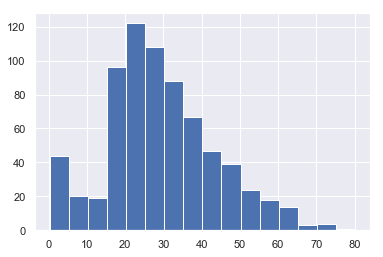

In [5]:
import matplotlib.pyplot as plt

df['Age'].hist(bins=16)
plt.show()

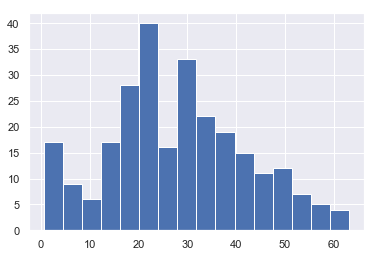

In [6]:
# plot the same histogram for male and female

df[(df["Sex"] == "female")].Age.hist(bins=16)
plt.show()

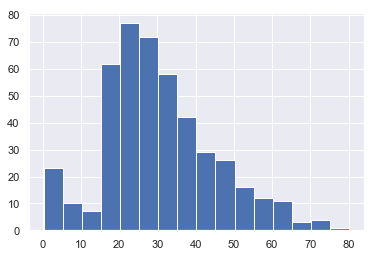

In [7]:
df[(df["Sex"] == "male")].Age.hist(bins=16)
plt.show()

In [8]:
# how many age values are empty
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
np.sum(df['PassengerId'].duplicated())

0

In [10]:
np.sum(df['Name'].duplicated())

0

In [11]:
np.sum(df['Ticket'].duplicated())

210

# 210 People had the same ticket number. STOWAWAYS??? Let's find out who.

In [12]:
ids = df['Ticket']

sorted_tickets = sorted(df['Ticket'])
# df[sorted_tickets]
df[ids.isin(ids[ids.duplicated()])].sort_values(by=['Ticket'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
257,258,1,1,"Cherry, Miss. Gladys",female,30.00,0,0,110152,86.5000,B77,S
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.00,0,0,110152,86.5000,B77,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.00,0,0,110152,86.5000,B79,S
262,263,0,1,"Taussig, Mr. Emil",male,52.00,1,1,110413,79.6500,E67,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.00,1,1,110413,79.6500,E67,S
585,586,1,1,"Taussig, Miss. Ruth",female,18.00,0,2,110413,79.6500,E68,S
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.00,0,0,110465,52.0000,C110,S
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
523,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.00,0,1,111361,57.9792,B18,C
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.00,0,1,111361,57.9792,B18,C


In [13]:
df["gender_binary"] = df["Sex"].apply(lambda sex: 1 if sex == "male" else 0)
# df["Gender"] = df['Sex'].map({'female': 0, 'male': 1}).astype(int)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender_binary
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


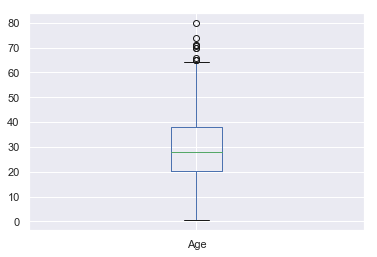

In [14]:
# Show the majority of age range
# green line is median
df['Age'].plot.box()

In [15]:
# list all ages that are not null
df['Age'].dropna().values

array([22.  , 38.  , 26.  , 35.  , 35.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 31.  , 35.  ,
       34.  , 15.  , 28.  ,  8.  , 38.  , 19.  , 40.  , 66.  , 28.  ,
       42.  , 21.  , 18.  , 14.  , 40.  , 27.  ,  3.  , 19.  , 18.  ,
        7.  , 21.  , 49.  , 29.  , 65.  , 21.  , 28.5 ,  5.  , 11.  ,
       22.  , 38.  , 45.  ,  4.  , 29.  , 19.  , 17.  , 26.  , 32.  ,
       16.  , 21.  , 26.  , 32.  , 25.  ,  0.83, 30.  , 22.  , 29.  ,
       28.  , 17.  , 33.  , 16.  , 23.  , 24.  , 29.  , 20.  , 46.  ,
       26.  , 59.  , 71.  , 23.  , 34.  , 34.  , 28.  , 21.  , 33.  ,
       37.  , 28.  , 21.  , 38.  , 47.  , 14.5 , 22.  , 20.  , 17.  ,
       21.  , 70.5 , 29.  , 24.  ,  2.  , 21.  , 32.5 , 32.5 , 54.  ,
       12.  , 24.  , 45.  , 33.  , 20.  , 47.  , 29.  , 25.  , 23.  ,
       19.  , 37.  , 16.  , 24.  , 22.  , 24.  , 19.  , 18.  , 19.  ,
       27.  ,  9.  , 36.5 , 42.  , 51.  , 22.  , 55.5 , 40.5 , 51.  ,
       16.  , 30.  ,

In [16]:
df[df['Embarked'] == 'C'].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender_binary
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,1


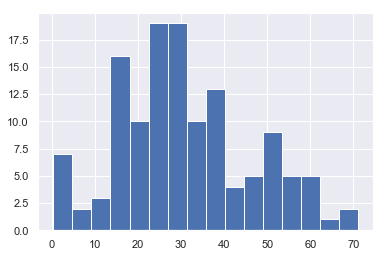

In [17]:
# Plot the age range for those who embarked section C
# df[df['Embarked'] == 'C']['Age'].hist(bins = 16)
df[df['Embarked'] == 'C'].Age.hist(bins = 16)

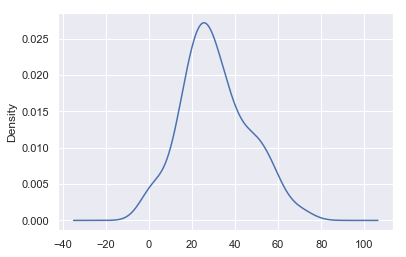

In [18]:
df[df['Embarked'] == 'C'].Age.plot(kind='kde')

In [19]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [20]:
df['Embarked'].nunique()

3

In [21]:
# count the different embarked values for different ports
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

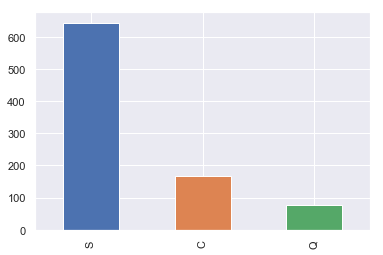

In [22]:
df['Embarked'].value_counts().plot(kind='bar')

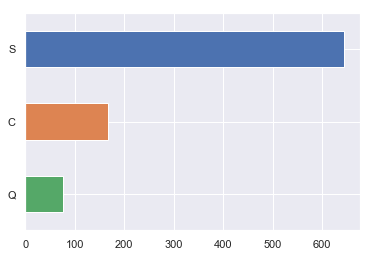

In [23]:
df['Embarked'].value_counts().plot('barh').invert_yaxis()

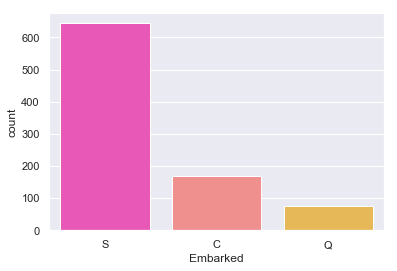

In [24]:
# Seaborn (sns) method

sns.countplot(x = "Embarked", palette = "spring", data = df)

In [25]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

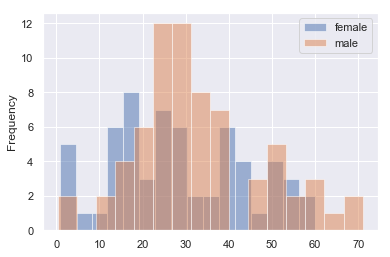

In [26]:
# Plot how many passengers were children, youth, middle aged, old based on the sex of those who embarked at section C

df[df['Embarked'] == 'C'].groupby('Sex')['Age'].plot(bins=16, alpha=.5, legend=True, kind='hist')

In [27]:
df[df['Embarked'] == 'C'].groupby('Sex')['Age'].value_counts()

Sex     Age  
female  24.00    5
        17.00    3
        18.00    3
        30.00    3
        0.75     2
        14.00    2
        15.00    2
        22.00    2
        23.00    2
        38.00    2
        39.00    2
        44.00    2
        50.00    2
        54.00    2
        1.00     1
        3.00     1
        4.00     1
        5.00     1
        9.00     1
        13.00    1
        14.50    1
        16.00    1
        19.00    1
        21.00    1
        27.00    1
        28.00    1
        29.00    1
        31.00    1
        32.00    1
        35.00    1
                ..
male    49.00    3
        17.00    2
        23.00    2
        24.00    2
        29.00    2
        33.00    2
        56.00    2
        58.00    2
        71.00    2
        0.42     1
        1.00     1
        11.00    1
        12.00    1
        15.00    1
        18.00    1
        23.50    1
        28.00    1
        28.50    1
        31.00    1
        32.00    1
        32.50    

In [28]:
# average age for female/male for those who embarked section C
import statistics 

# df[df['Embarked'] == 'C'].groupby('Sex')['Age'].agg(np.mean)
df[df['Embarked'] == 'C'].groupby('Sex')['Age'].mean()

Sex
female    28.344262
male      32.998841
Name: Age, dtype: float64

In [29]:
# who is the oldest male/female for those that embarked section C
df[df['Embarked'] == 'C'].groupby('Sex')['Age'].max()

Sex
female    60.0
male      71.0
Name: Age, dtype: float64

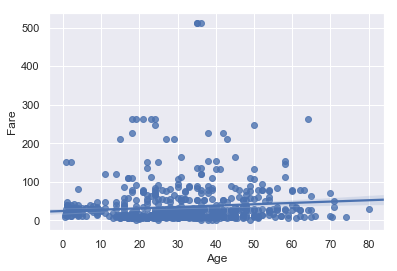

In [33]:
# for different ages, plot the fare they paid
# continuous data. On any axis, data can take almost any value between min and max
sns.regplot(x = "Age", y = "Fare", data = df)

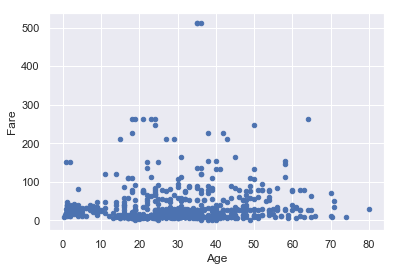

In [34]:
df.plot.scatter(x = "Age", y = "Fare")

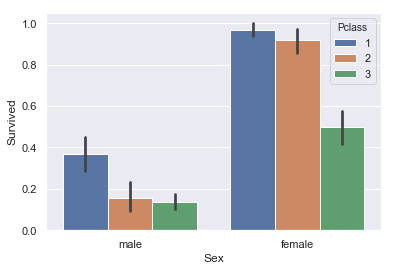

In [41]:
# percentage survived for male/female based on passenger class
sns.barplot(x = "Sex", y = "Survived", hue = "Pclass", data = df)

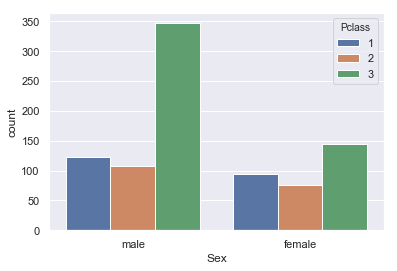

In [49]:
# how many male/female were in different passenger classes
sns.countplot(x = "Sex", hue = "Pclass", data = df)

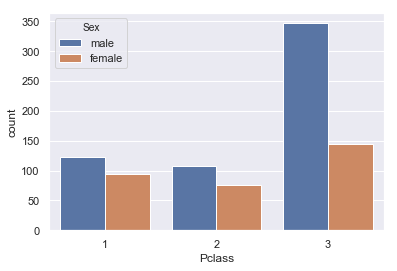

In [50]:
sns.countplot(x = "Pclass", hue = "Sex", data = df)

In [68]:
len(df[(df['Sex'] == "female") & (df['Survived'] == 1) & (df['Pclass'] == 1)])/len(df[(df['Sex'] == "female") & (df['Pclass'] == 1)])

0.9680851063829787

In [69]:
len(df[(df['Sex'] == "female") & (df['Survived'] == 1) & (df['Pclass'] == 1)])

91

In [70]:
len(df[(df['Sex'] == "female") & (df['Pclass'] == 1)])

94

In [71]:
df[(df['Sex'] == "female") & (df['Pclass'] == 1)]['Survived'].value_counts()

1    91
0     3
Name: Survived, dtype: int64

In [72]:
91/(91+3)

0.9680851063829787

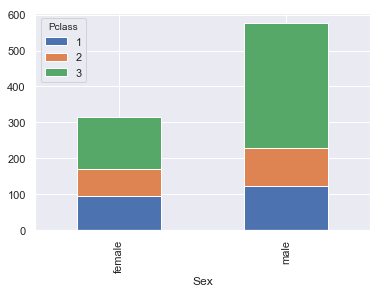

In [76]:
# Stack plots of counts based on sex for different passenger classes
df.groupby(['Sex'])['Pclass'].value_counts().unstack().plot(kind='bar', stacked = True)

In [77]:
df.groupby(['Sex'])['Pclass'].value_counts().unstack()

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [78]:
df.groupby(['Sex'])['Pclass'].value_counts()

Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64

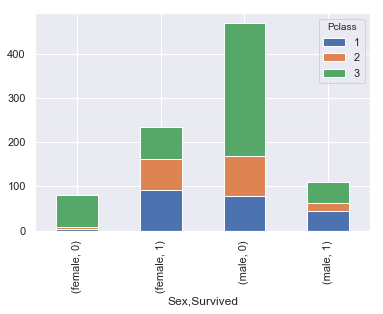

In [80]:
# stack plot of count based on sex and survival for different passenger classes
df.groupby(['Sex', 'Survived'])['Pclass'].value_counts().unstack().plot(kind='bar', stacked = True)

In [81]:
pd.crosstab(df['Sex'], df['Pclass'])

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [82]:
pd.crosstab(df['Sex'], df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [83]:
pd.crosstab(df['Sex'], df['Embarked'])

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


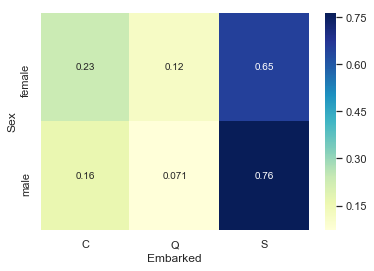

In [84]:
# how to represent above cross tab in percent and graphically present
sns.heatmap(pd.crosstab(df['Sex'], df['Embarked'], normalize = 'index'), cmap = "YlGnBu", annot = True)

In [85]:
441/(441+41+95)

0.7642980935875217